In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Leo el archivo xlsx
ruta_del_archivo = r'C:\Users\Usuario\Desktop\Programación\Escuela Data Science y Machine Learning\Curso Business Intelligence\Caso práctico business intelligence.xlsx'
df = pd.read_excel(ruta_del_archivo)


In [16]:
df.rename(columns={"Ciudad ": "Ciudad"}, inplace=True)


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

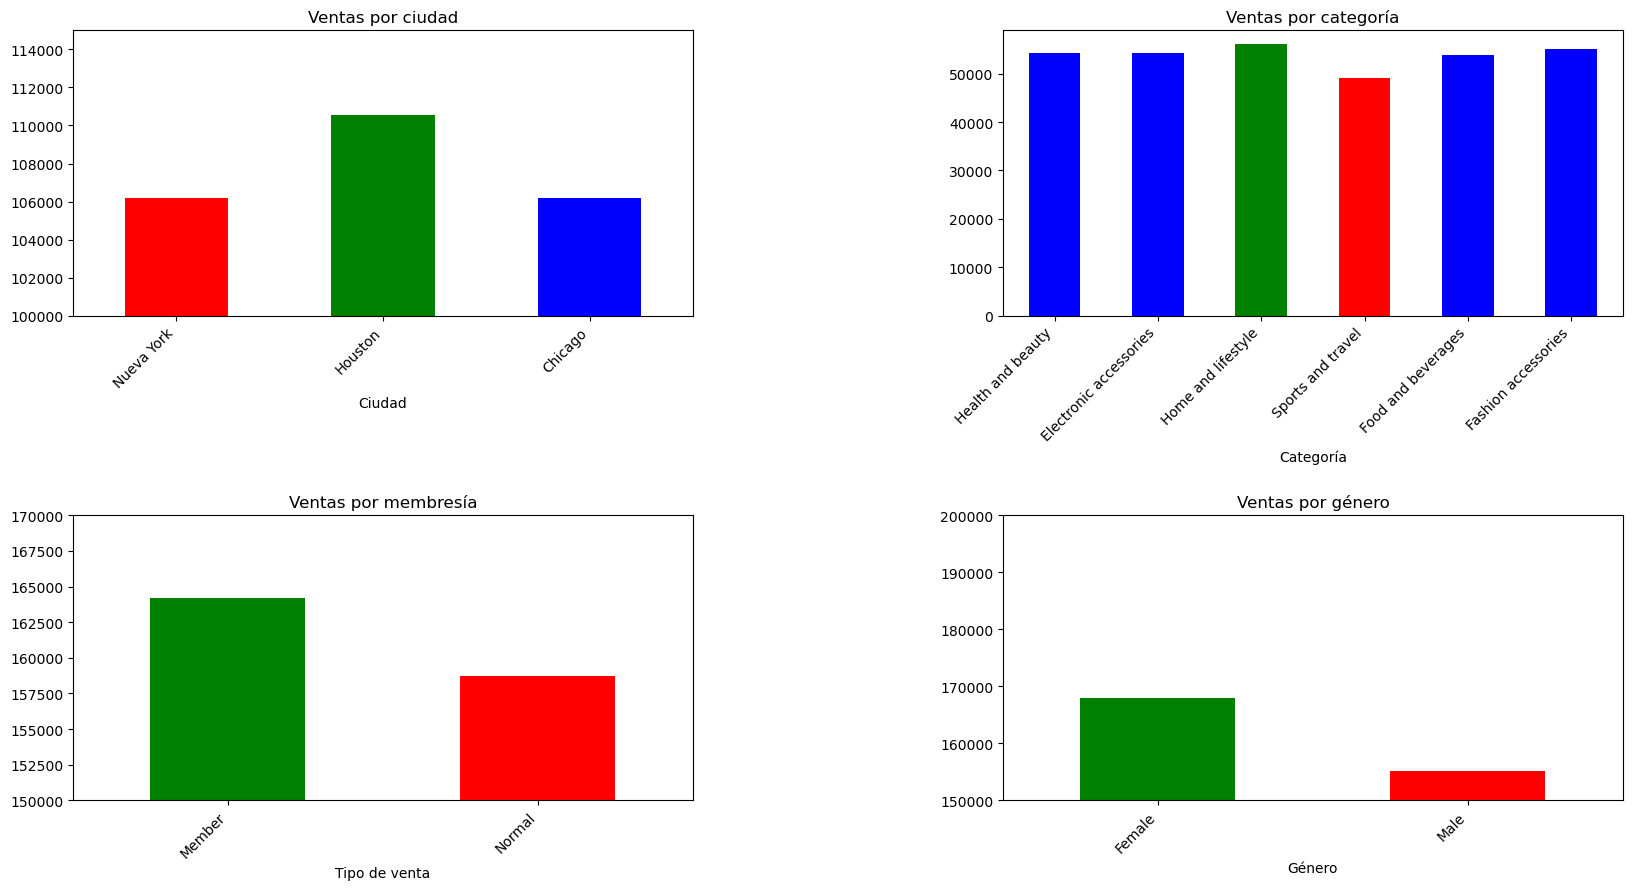

In [76]:
fig, ax = plt.subplots(2, 2 , figsize=(20, 10))
fig.subplots_adjust(hspace=0.7, wspace=0.5)
#Relación entre ventas por ciudad
ventas_ciudad = df.groupby("Ciudad")["Venta"].sum()
colores = ["red" if x == ventas_ciudad.min() else "green" if x == ventas_ciudad.max() else "blue" for x in ventas_ciudad]
ventas_ciudad.plot(kind="bar", ax=ax[0,0], color=colores)
ax[0,0].set_title("Ventas por ciudad")
ax[0, 0].set_xticklabels(df["Ciudad"].unique(), rotation=45, ha="right")
ax[0,0].set_ylim(100000, 115000)
#Ventas por categoría
ventas_categoria = df.groupby("Categoría")["Venta"].sum()
colores = ["red" if x == ventas_categoria.min() else "green" if x == ventas_categoria.max() else "blue" for x in ventas_categoria]
ventas_categoria.plot(kind="bar", ax=ax[0,1], color=colores)
ax[0,1].set_title("Ventas por categoría")
ax[0,1].set_xticklabels(df["Categoría"].unique(), rotation=45, ha="right")
#Ventas por tipo de venta
ventas_tipo = df.groupby("Tipo de venta")["Venta"].sum()
colores = ["red" if x == ventas_tipo.min() else "green" if x == ventas_tipo.max() else "blue" for x in ventas_tipo]
ventas_tipo.plot(kind="bar", ax=ax[1,0], color=colores)
ax[1,0].set_title("Ventas por membresía")
ax[1,0].set_ylim(150000, 170000)
ax[1,0].set_xticklabels(df["Tipo de venta"].unique(), rotation=45, ha="right")
#Ventas por género
ventas_genero = df.groupby("Género")["Venta"].sum()
colores = ["red" if x == ventas_genero.min() else "green" if x == ventas_genero.max() else "blue" for x in ventas_genero]
ventas_genero.plot(kind="bar", ax=ax[1,1], color=colores)
ax[1,1].set_title("Ventas por género")
ax[1,1].set_ylim(150000, 200000)
ax[1,1].set_xticklabels(df["Género"].unique(), rotation=45, ha="right")


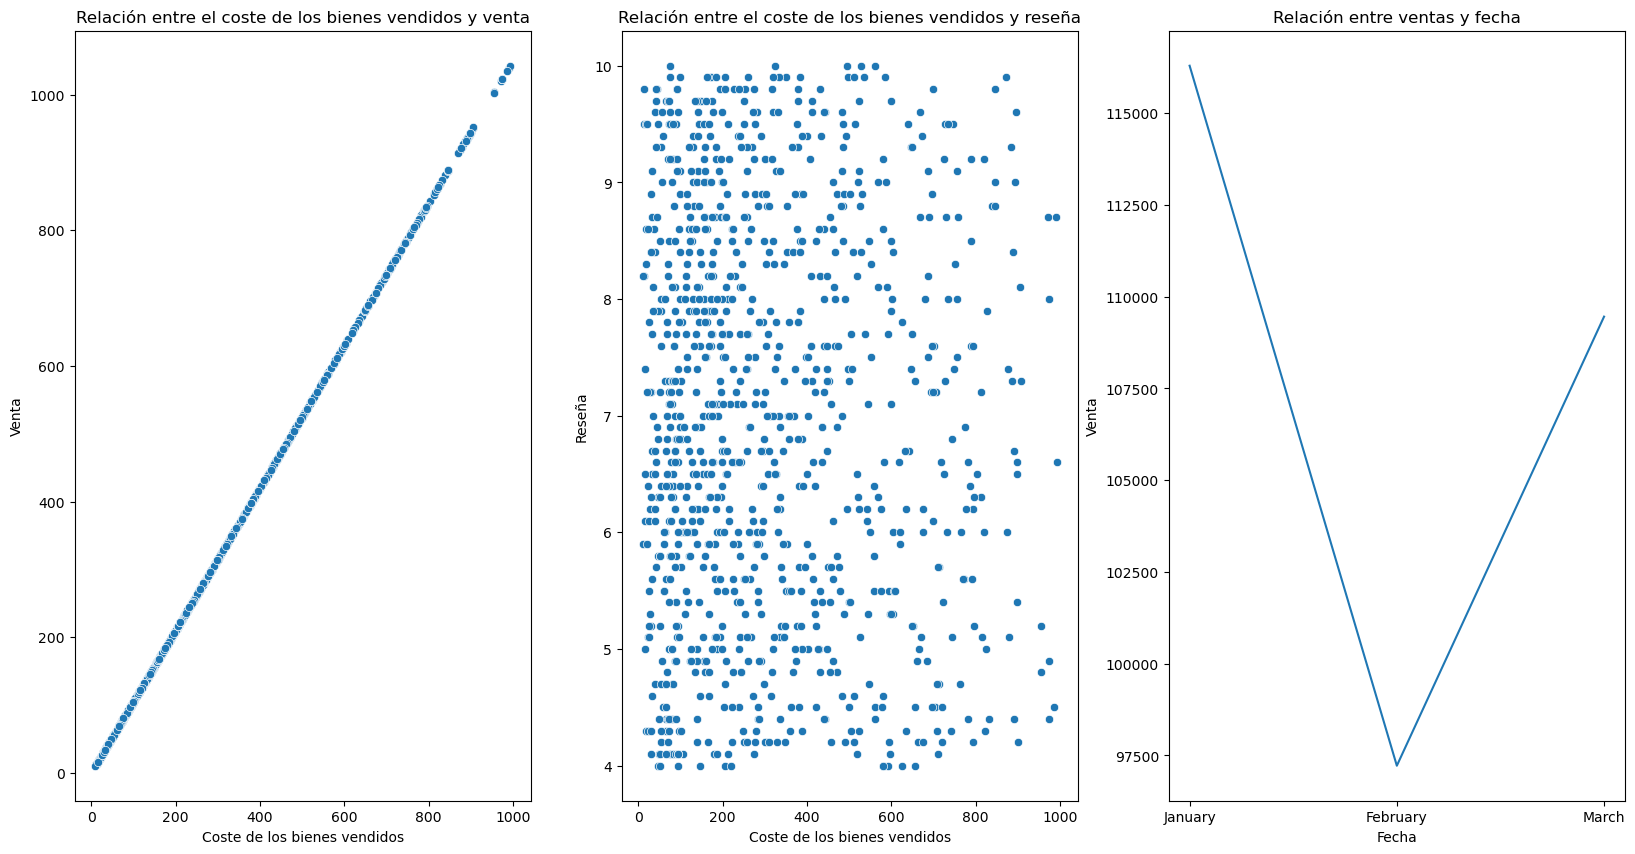

In [106]:

fig, ax = plt.subplots(1, 3 , figsize=(20, 10))
#Relación entre el coste de los bienes vendidos y venta
sns.scatterplot(x="Coste de los bienes vendidos", y="Venta", data=df, ax=ax[0])
ax[0].set_title("Relación entre el coste de los bienes vendidos y venta")
#Relación entre el coste de los bienes vendidos y reseña
sns.scatterplot(x="Coste de los bienes vendidos", y="Reseña", data=df, ax=ax[1])
ax[1].set_title("Relación entre el coste de los bienes vendidos y reseña")
#Relación entre entre ventas y fecha
df["Fecha"] = pd.to_datetime(df["Fecha"])
df_mes = df.groupby(pd.Grouper(key="Fecha", freq="M")).sum()
df_mes["Fecha"] = df_mes.index
df_mes["Fecha"] = df_mes["Fecha"].dt.strftime("%B")
sns.lineplot(x="Fecha", y="Venta", data=df_mes, ax=ax[2])
ax[2].set_title("Relación entre ventas y fecha")
plt.show()